<a href="https://colab.research.google.com/github/LivingstonTardzenyuy/Deep-Learning-with-TensorFlow/blob/main/04_transfer_learning_in_tensorflow_feature_extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Transfer learning with Tensorflow part 1 Feature Extraction.

Transfer learning is leveraging a model existing architecture and learned patterns from our own model.

The 2 main benefits are:
1. Can leverage an existing neural network arhcitecutre proven to work similar to our own.
2. Can levarage a working neural architecture which have already learn patterns similar to our own then we can adapt that data.


In [1]:
# check wether we have gpu.

!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-3e100eef-51bb-7bfe-d99d-6a2c47a02dbb)


In [2]:
# download and becoming one with the data.
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

import zipfile
zip_ref = zipfile.ZipFile("10_food_classes_10_percent.zip")
zip_ref.extractall()
zip_ref.close()

--2025-08-17 18:05:06--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.68.207, 142.250.4.207, 74.125.24.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.68.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip.2’

10_food_classes_10_ 100%[===================>] 160.74M  22.2MB/s    in 8.7s    

2025-08-17 18:05:16 (18.4 MB/s) - ‘10_food_classes_10_percent.zip.2’ saved [168546183/168546183]



In [3]:
# Walk through all our directory.
from pathlib import Path
import os

for dirpath, dirnames, filenames in os.walk("10_food_classes_10_percent"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}' .")

There are 2 directories and 0 images in '10_food_classes_10_percent' .
There are 10 directories and 0 images in '10_food_classes_10_percent/test' .
There are 0 directories and 250 images in '10_food_classes_10_percent/test/steak' .
There are 0 directories and 250 images in '10_food_classes_10_percent/test/grilled_salmon' .
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ice_cream' .
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_wings' .
There are 0 directories and 250 images in '10_food_classes_10_percent/test/sushi' .
There are 0 directories and 250 images in '10_food_classes_10_percent/test/pizza' .
There are 0 directories and 250 images in '10_food_classes_10_percent/test/fried_rice' .
There are 0 directories and 250 images in '10_food_classes_10_percent/test/hamburger' .
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ramen' .
There are 0 directories and 250 images in '10_food_classes_10_perc

In [4]:
# a function to randomly visualize some iamges.
import matplotlib.pyplot as plt
import random
import os
import pathlib

def view_random_image(target_dir, target_class):
  target_folder = pathlib.Path(target_dir)
  target_class_dir = target_folder / target_class
  random_image = random.sample(os.listdir(target_class_dir), 1)
  img = plt.imread(target_class_dir / random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}")

Image shape: (384, 512, 3)


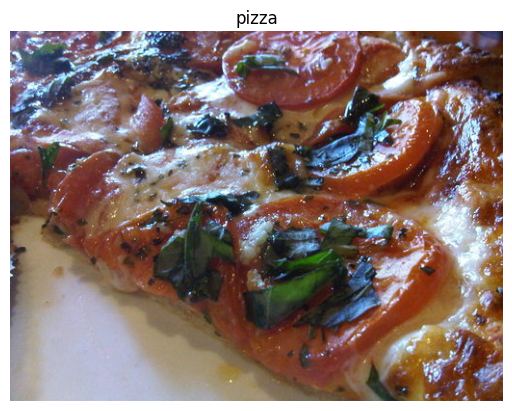

In [5]:
view_random_image(target_dir="10_food_classes_10_percent/train", target_class="pizza")

## Creating data loaders (preparing the data)

We'll use the ImageDataGenerator class to load in our images in batches.

In [6]:
# Setup data inputs.
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SHAPE = (224, 224)
BATCH_SIZE = 32
EPOCHS_SIZE = 5

train_dir = "10_food_classes_10_percent/train/"
test_dir = "10_food_classes_10_percent/test/"

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# train_datagen = train_datagen.flow_from_directory(

# )

print("Training images:")
train_data_10_percent = train_datagen.flow_from_directory(
    train_dir,
    target_size = IMAGE_SHAPE,
    batch_size = BATCH_SIZE,
    class_mode = "categorical"
)

print("Test images")
test_data_10_percent = test_datagen.flow_from_directory(
    test_dir,
    target_size = IMAGE_SHAPE,
    batch_size = BATCH_SIZE,
    class_mode = "categorical"
)


Training images:
Found 750 images belonging to 10 classes.
Test images
Found 2500 images belonging to 10 classes.


# Setting up callbacks.

Callbacks are things to run while our model is training.

Callback provide extra functionality to add to our model to perforomed during or after training. Some of the popular callbacks are.

1. Tracking experiments with tensorboard callback.
2. ModelCheckpointing callback.
3. Stopping model from training before it continue training and overfit using EarlyStopping callback.

In [7]:
# Create Tensorboard callback (functionized becuase we want to create a new one for each model)

import datetime
import tensorflow as tf # Import tensorflow here

def create_tensorboard_callback(dir_name, experiment_name):
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)
  print(f"Saving TensorBoard log files to: {log_dir}")
  return tensorboard_callback

# Creating models using TensorFlow Hub

In the past we've used TensorFlow to create our own models layer by lyaer from scratch.

Now we're going to do a similar process, except the majority of our model's layers are going to come from Tensorflow Hub.

We can access pretrained model on https://tfhub.dev/

In [8]:

  import tensorflow_hub as hub

  model = hub.KerasLayer("https://tfhub.dev/google/nnlm-en-dim128/2")
  embeddings = model(["The rain in Spain.", "falls",
                      "mainly", "In the plain!"])

  print(embeddings.shape)  #(4,128)

(4, 128)


In [9]:
# Let's compaire the following models.
reset_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/5"

efficientnet_url = "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1"

In [10]:
# import dependences.
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers

In [12]:
# Let's create a create_model() function to create a model from a url.
def create_model(model_url, num_classes = 10):
  """
    Takes a Tensorflow Hub URL and creates a Keras Sequential model with it.

    Args:
      model_url (str): A TensorFlow hub feature extraction url.
      num_classes (int): Number of output neurons in the output layer,
      should be equal to number of target classes, default = 10,
    Returns:
    An uncompiled Keras Sequential model with model_url as feature extactor
    layer and Dense output layer with num_classes output neuron
  """
  # Wrap the TensorFlow Hub layer within a Keras Layer
  feature_extractor_layer = tf.keras.layers.Lambda(
      lambda x: hub.KerasLayer(model_url, trainable=False)(x),
      name = "feature_extraction_layer",
      input_shape = IMAGE_SHAPE +(3,)
  )


  # Create our model.
  model = tf.keras.Sequential([
      feature_extractor_layer,
      tf.keras.layers.Dense(num_classes, activation="softmax", name="output_layer")
  ])

  return model

## Creating ReseNet Tfhub feature extraction model.

In [1]:
# Create Resnet model.

resnet_model = create_model(reset_url, num_classes=train_data_10_percent.num_classes)

# Compile the model.
resnet_model.compile(
    loss = "categorical_crossentropy",
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

# fit the model.
resnet_model_history = resnet_model.fit(
    train_data_10_percent,
    epochs = EPOCHS_SIZE,
    steps_per_epoch = len(train_data_10_percent),
    validation_data = test_data_10_percent,
    validation_steps = len(test_data_10_percent),
    callbacks = [create_tensorboard_callback(dir_name="tensorflow_hub", experiment_name="resnet")]
)

NameError: name 'create_model' is not defined

In [2]:
IMAGE_SHAPE

NameError: name 'IMAGE_SHAPE' is not defined

In [ ]:
# Create Resnet model.

efficientnet_model = create_model(efficientnet_url, num_classes=train_data_10_percent.num_classes)

# Compile the model.
efficientnet_model.compile(
    loss = "categorical_crossentropy",
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

# fit the model.
efficientnet_model_history = efficientnet_model.fit(
    train_data_10_percent,
    epochs = EPOCHS_SIZE,
    steps_per_epoch = len(train_data_10_percent),
    validation_data = test_data_10_percent,
    validation_steps = len(test_data_10_percent),
    callbacks = [create_tensorboard_callback(dir_name="tensorflow_hub", experiment_name="efficientnet")]
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/lambda_layer.py:65: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Saving TensorBoard log files to: tensorflow_hub/efficientnet/20250817-180547


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
 1/24 ━━━━━━━━━━━━━━━━━━━━ 27:02 71s/step - accuracy: 0.0625 - loss: 2.4822